# k-최근접 이웃 회귀

### 해결할 문제 

#### 농어를 무게 단위로 판매할 예정
#### 공급처에서 농어의 무게를 잘못 측정하여 보내옴.
#### 농어의 길이, 높이 두꼐로 무게를 예측하고자 함

### 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

## 산점도 그리기

In [3]:
import matplotlib.pyplot as plt

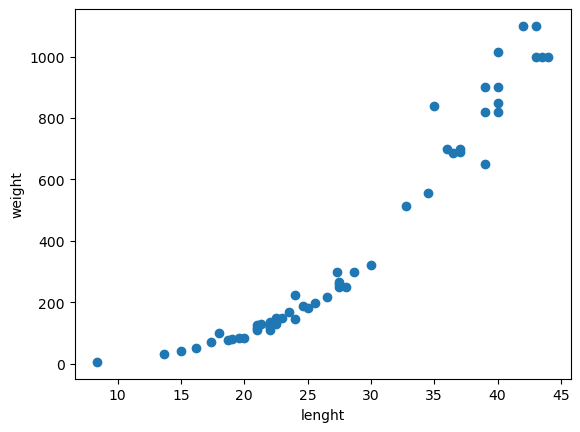

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

#### 농어의 길이가 길어짐에 따라 무게도 늘어남.

## 훈련 세트 준비

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) 

In [7]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [8]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

### 사이킷런에서 사용할 훈련세트는 2차원 배열이어야 함.

In [9]:
# <예제>
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [10]:
# 배열의 차원을 조정 : reshape()
test_array = test_array.reshape(2,2)
print(test_array)

[[1 2]
 [3 4]]


In [11]:
test_array.shape

(2, 2)

#### train_input과 test_input을 2차원 배열로 바꾸기

In [12]:
# -1 : 배열 전체 원소의 갯수를 의미
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### k-최근접 이웃 회귀 알고리즘을 사용하여 훈련 및 평가

#### k-최근접 이웃 회귀 클래스 : KNeighborsRegressor

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

#### 테스트 점수 확인

In [14]:
knr.score(test_input, test_target)

0.992809406101064

### 회귀 알고리즘의 평가

#### 분류 : 테스트 세트에 있는 샘플을 정확히 분류한 갯수의 비율 -> 정확도
#### 회귀 : 정확한 숫자를 맞추는 것이 불가능함 -> 결정계수로 평가함.

## $R^2$ = 1 - $(타겟 - 예측)^2$의 합 / $(타겟 - 평균)^2$의 합

#### 예측한 값이 타깃에 가까워지면 1에 가까운 값이 된다.
#### score()의 출력하는 값이 높을수록 좋다.

#### 예측한 값이 어느 정도 타깃값에서 벗어났는지 확인: mean_absolute_error()

In [15]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차 계산.
maen_error = mean_absolute_error(test_target, test_prediction)
print(maen_error)

19.157142857142862


#### 평균적으로 19g 정도 타깃값과 다르다.

### 과대적합 vs 과소적합

In [16]:
# 훈련 세트를 평가
print(knr.score(train_input, train_target))

0.9698823289099254


#### 훈련세트로 훈련하고 훈련세트로 평가하면 점수가 높게 나온다.

In [17]:
# 테스트 세트를 평가
print(knr.score(test_input, test_target))

0.992809406101064


### 앞에서 처럼 훈련세트의 평가점수보다 테스트 세트의 평가점수가 높다 => 과소적합(underfitting)

## 과소적합을  해결하는 방법

#### (1) 훈련 세트에 더 잘 맞게 만들어 준다.
####       이웃의 기본 값(k)은 5 -> 3으로 줄인다.
#### * 과대적합일 경우 k 이웃값을 늘린다.
#### * 과소적합일 경우 k 이웃값을 줄인다.

In [18]:
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [21]:
# 테스트 세트에 대해서 평가
print(knr.score(test_input, test_target))

0.9746459963987609


#### 테스트 세트의 점수가 훈련세트의 점수보다 낮아졌으므로 과소적합 문제 해결.

### 산점도를 그려 K값을 변경하여 훈련

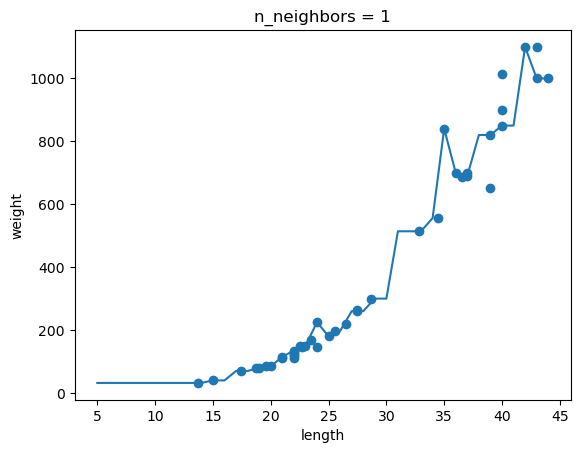

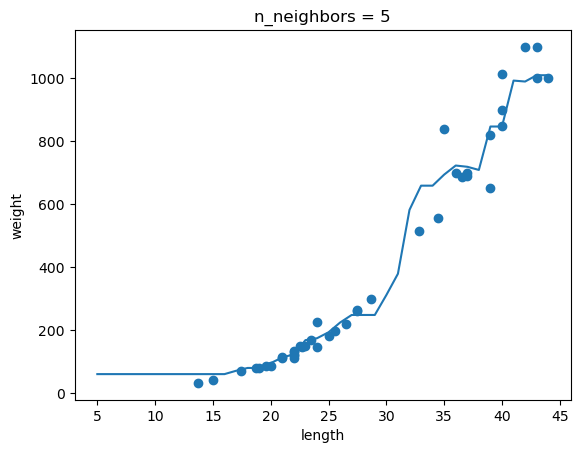

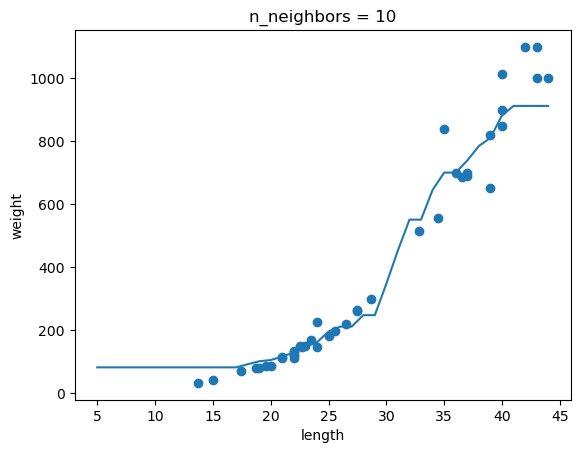

In [22]:
knr = KNeighborsRegressor()

# 농어의 길이를 5에서 45까지 바꿔가면 예측
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일때 예측 결과를 그래프로 그린다.
for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 x 범위에 대해 예측 실행
    prediction = knr.predict(x)
    
    # 훈련 세트와 예측 결과를 그래프로 그린다.
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()